<a href="https://colab.research.google.com/github/PosgradoMNA/A01793027_Actividades_de_aprendizaje_Carlos_Daniel_Mendoza_Paz/blob/main/Semana_5_Data_Analysis_with_Python_(IBM)_A01793027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y Analitica de datos**
##**Data Analysis with Python**
##Alumno: Carlos Daniel Mendoza Paz
##Matricula: A01793027


-------------------------------------------------
##**Module 2: Data Wrangling**
-------------------------------------------------


###Data Pre-processing techniques

Esto se refiere al proceso de convertir datos de una forma cruda a una forma ya con formato para así ir preparando los datos

#**¿Que hacer con los missing values?**

Cuando checamos un dataset nos podemos encontrar con "missing values" lo que podemos hacer con estos valores es lo siguiente:

Eliminar datos:
* Eliminar la variable
* Eliminar el dato de entrada

Remplazar datos:
* Remplazar esos datos con valores similares o con el promedio de ellos
* Se puede utilizar la moda para remplazar esos datos
* Replazarlo basado en otras funciones

Si no aplicas ninguna de estas técnicas puedes entonces dejar los valores vacios y simplemente removerlos.

Como remover esos missing values que tenemos. 
Para ello debemos de utilizar el metodo dropna()

###Usando dropna para remover missing values

dropna() es un metodo que nos ayudará a remover esos missing values de nuestro dataset identificados como NaN. De esta forma tendremos un dataset mucho mas limpio.
Sin embargo dropna tiene diferentes argumentos como los que se muestran en la imagen siguiente.

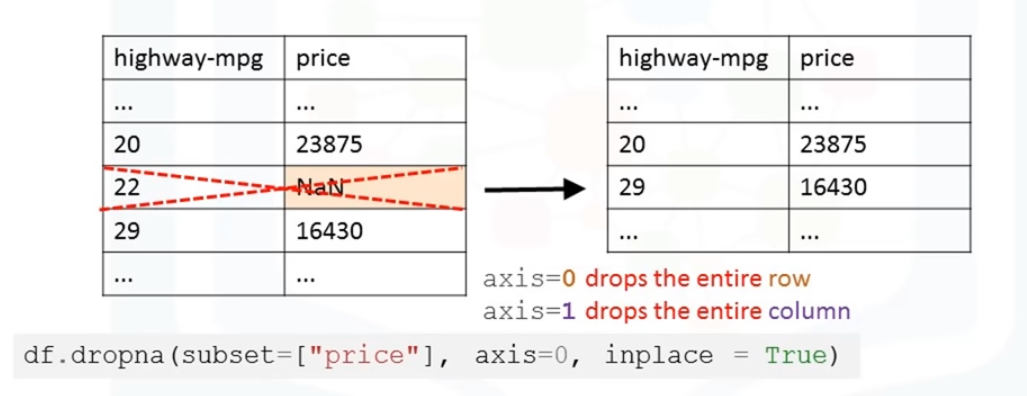

Si pones axis=0 nos eliminará la fila completa donde se encuentra nuestro dato NaN. 
Si pones axis=1 nos eliminará la columna completa donde se encuentra nuestro dato NaN.

In [ ]:
df.dropna(subset=["price"], axis=0) #Así no estamos modificando nuestro data set

In [ ]:
df.dropna(subset=["price"], axis=0, inplace=True) #Así si estamos modificando nuestro dataset a la hora de poner "inplace=True"

Como remplazar los datos NaN por nuevos datos.
Para ello pandas tiene la siguiente linea de código

In [ ]:
df.replace(missing_value, new_value) #Usando esta linea de código podremos remplazar datos en el dataset

Como se mencionó en un principio, para poder remplazar valores nulos, se podría utilizar la media de la variable, osea la media de esa columna y agregarlo en el dato nulo para rellenarlo así.

In [ ]:
#Primero debemos de calcular la media
mean = df["normalized-losses"].mean() #normalized-losses es el nombre de la columna

In [ ]:
#Ahora que ya tenemos el valor de la media procedemos a remplazar esos datos nulos
df["normalized-losses"].replace(np.nan,mean)

###**¿Porque formatear los datasets?**

Dado que los datos provienen de diferentes fuentes y lugares, así como también estos son tomados por diferntes personas. Pueden venir de diferentes formas, entonces formatearlos se convierte en algo crucial dado que así podemos hacer que esos datos sean entendibles para el usuario. 

Por ejemplo Nueva York podría abreviarse de diferentes formas NY, New York, N.Y, NY.

Entonces formatear esto se vuelve crucial.

También el formateo se puede aplicar por ejemplo a una columna que trae galones por kilometro, podríamos aplicar un calculo y convertir todos estos datos en Km por Litro.

In [ ]:
#Podemos hacer la conversion de galones/millas a litros/km con la siguiente linea de código
df["city-mpg"]=235/df["city-mpg"]

In [ ]:
#Con la siguiente linea podremos renombrar la columna con las nuevas unidades que esta representa
df.rename(columns={"city_mpg":"city-L/100km"}, inplace=True)

###**¿Como corregir un datatype en Python?**

En muchas ocasionés los datatypes no estan correctos, por ejemplo cuando esto pasa podemos entonces corregirlo con el siguiente linea de codigo.


In [ ]:
#Usamos esta linea de código para identificar el tipo de dato de la variable que queremos concerlo
df.dtypes(variable)

In [ ]:
#Una vez que sabemos el tipo de dato que es esa variable, ahora la podemos convertir al formato deseado
df.astype()

In [ ]:
#En la siguiente linea de código convertiremos a entero la columna price de nuestro dataset
df["price"] = df["price"].astype("int")


##**Normalización de datos**

Se requiere normalizar los datos cuando estos se encuentran en escalas muy diferentes, lo cual nos podría causar ruido a la hora de hacer calculos estadisticos. Para ello debimos antes normalizarlos.

Normalizarlos significa llevar todos los datos a una nueva misma escala, esta va de 0-1.
Entonces ahora si de esta forma ya podemos trbajar con los datos para realizar calculos estadisticos.


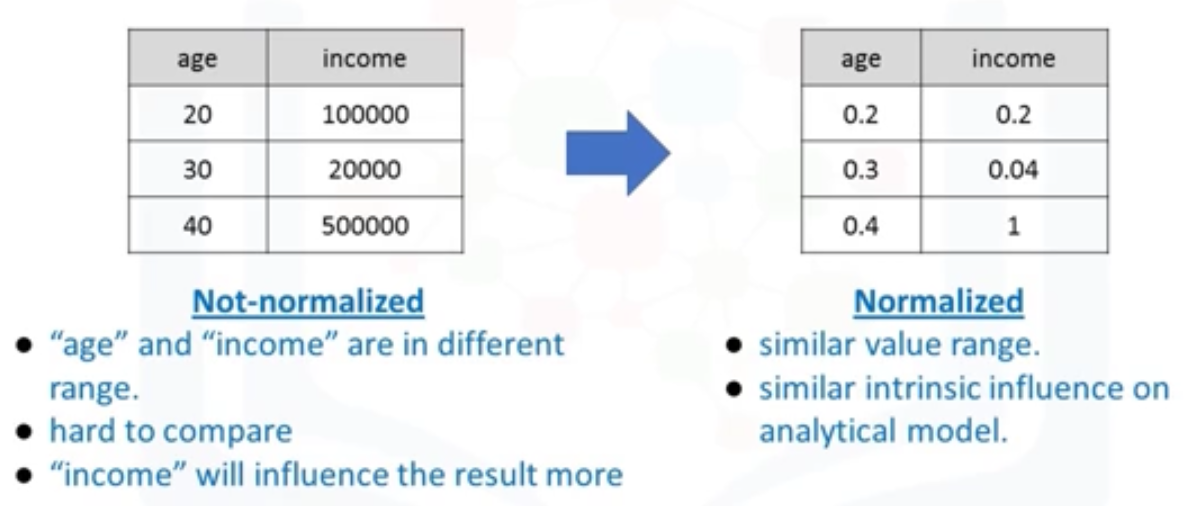

##**Metodos para normalizar datos**

Existen diferentes de ellos. Listados e ilustrados debajo:

1. Escalado simple
2. Maximos y Minimos
3. Z-Score

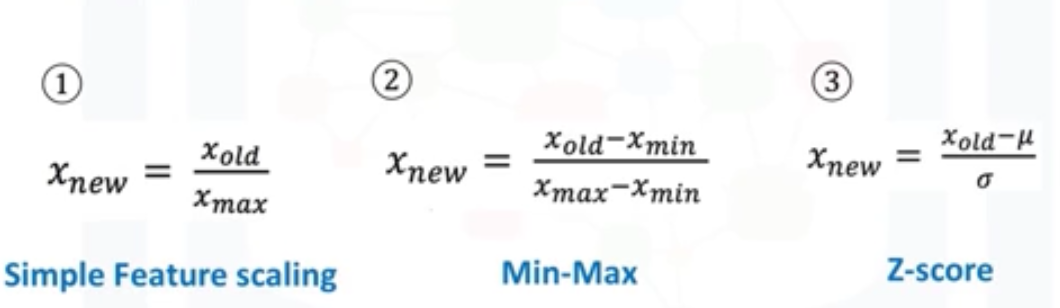

In [ ]:
#Escalando datos usando el metodo 1
df["length"] = df["length"] / df["length"].max()

In [ ]:
#Escalando datos usando el metodo 2
df["length"] = (df["length"]-df["length"].min)/
              (df["length"]).max()-df["length"].min())

In [ ]:
#Escalando datos usando el metodo 3
df["length"] = (df["length"]-df["length"].mean()) / df["length"].std())

##**Binning**

Se refiere a cuando agrupamos datos. Por ejemplo retomando el ejemplo de los precios de los autos. Podemos agrupar esos precios en grupos que podemos llamar "Low", "Medium" & "High" de esta forma será mas entendible nuestro dataset. 

Para ello podemos utilizar la siguiente linea de código.


In [ ]:
#Crear binnings para la colimna precios
bins = np.linspace(min(df["price"]), max(df["price"]), 4) #usamos la funcion linspace() de Numpy

In [ ]:
#Creamos una lista con los nombres de los grupos que creamos
gorup_names = ["Low", "Medium", "High"]

In [ ]:
#Usamos la función cut para crear esos bins
df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest=True)

##**Convertir variables categoricas a cuantitativas**

En ocasiones es necesario convertir variables categoricas a variables numericas, ya que los modelos regularmente reciben solo variables numericas. Para poder hacer esto nos podemos ayudar de un metodo en pandas llamado pd.get_dummies()

Por ejemplo en el dataset tenemos diferentes categorias en nuestra variable Fuel, tenemos gas and diesel para diferentes autos.
Lo que este metodo hará será asignarle valores numéricos a cada una de las variables. Como se puede obervar en la imagen.


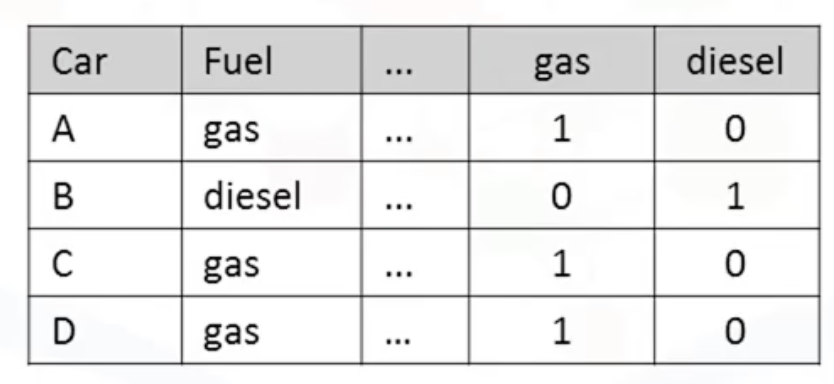

In [ ]:
#Con la siguiente linea de código podemos hacer la conversión
pd.get_dummies(df["Fuel"])

#**LAB Module 2**

**Lectura del dataset desde una URL y agregación de encabezados**

Importamos las librerias

In [441]:
#Importamos nuestras librearías
import pandas as pd
import matplotlib.pylab as plt
import numpy as np


Leemos el dataset desde la URL

In [442]:
#Asignamos la ubicación de nuestro dataset a la variable filename
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

Creamos una lista con los encabezados que llevará el dataset

In [443]:
#Creamos una lista con los nombres de los encabezados que llevará nuestro dataset
headers = ["symboling","normalized_losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Asignamos nuestro dataset a una variable y lo formateamos con los datasets que creamos anteriormente

In [444]:
#Cargamos nuestro dataframe a una variable df
df = pd.read_csv(filename, names = headers)

Verificamos que nuestro dataset haya quedado formateado con los headers que habíamos creado

In [445]:
#Verificamos que efectivamente se hayan asignado los encabezados a nuestro dataset
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Identificacíon y manejo de valores nulos**

Como se puede observar en el dataset, tenemos una serie de valores nulos, los cuales vienen denotados con un signo de interrogación "?". 
Hay que sustituir ese signo por el valor de NaN.

In [446]:
#Remplazaremos "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Ahora vamos a ver cuantos missing values tenemos en nuestro dataset. Para ello usamos el metodo .isnull(). Si obtenemos valores True, quiere decir que si tenemos valores missing, si obtenemos False, quiere decir que no.

In [447]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Usamos un ciclo for para contar el número de datos missing que tenemos por columna, y el metodo .value_counts() nos ayudará a contar los valores True. de cada una de las columnas

Como se puede observar no tenemos missing data, ya que la remplazamos anteriormente por los vallores de NaN

In [448]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    205
Name: symboling, dtype: int64

normalized_losses
False    164
True      41
Name: normalized_losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

**Manejo de datos nulos**

Vamos a calcular el valor de la media de la columna "normalized-losses" para despues usar ese valor para remplazar los datos nulos que tenemos en la columna.

In [449]:
#Calculamos la media de nuestra columna... y la formateamos como float
avg_norm_loss = df["normalized_losses"].astype("float").mean(axis=0)
print("Average of normalized_losses:", avg_norm_loss)

Average of normalized_losses: 122.0


Remplazamos en la columna "normalized-losses" esos valores nulos con el valor de la media que calculamos anteriormente.

In [450]:
df["normalized_losses"].replace(np.nan, avg_norm_loss, inplace = True)

Vamos a calcular el valor de la media de la columna "bore" para despues usar ese valor para remplazar los datos nulos que tenemos en la columna.

In [451]:
#Calculamos la media de la columna bore
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


Remplazamos en la columna "bore" esos valores nulos con el valor de la media que calculamos anteriormente.

In [452]:
#Remplazamos los NaN por la media que calculamos anteriormente
df["bore"].replace(np.nan, avg_bore, inplace = True)

###Question 1:
Based on the example above, replace NaN in "stroke" column with the mean value.

Vamos a calcular el valor de la media de la columna "num-of-doors" para despues usar ese valor para remplazar los datos nulos que tenemos en la columna.

In [453]:
#Calculamos la media de nuestra columna... y la formateamos como float
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


Remplazamos en la columna "stroke" esos valores nulos con el valor de la media que calculamos anteriormente.

In [454]:
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Vamos a calcular el valor de la media de la columna "horsepower" para despues usar ese valor para remplazar los datos nulos que tenemos en la columna.

In [455]:
#Calculamos la media de nuestra columna... y la formateamos como float
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("Average of horsepower:", avg_horsepower)

Average of horsepower: 104.25615763546799


Remplazamos en la columna "horsepower" esos valores nulos con el valor de la media que calculamos anteriormente.

In [456]:
df["horsepower"].replace(np.nan, avg_horsepower, inplace = True)

Vamos a calcular el valor de la media de la columna "peak-rpm" para despues usar ese valor para remplazar los datos nulos que tenemos en la columna.

In [457]:
#Calculamos la media de nuestra columna... y la formateamos como float
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)
print("Average of peak-rpm:", avg_peak_rpm)

Average of peak-rpm: 5125.369458128079


Remplazamos en la columna "peak-rpm" esos valores nulos con el valor de la media que calculamos anteriormente.

In [458]:
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace = True)

Utilizamos el metodo .value_counts() para ver que valores estan presentes en una columna en particular. De esta forma poder cuantos datos tenemos de cada categoria.
Como se puede observar es mucho mas comun encontrar vehiculos de cuatro puertas contra los de dos.

In [459]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

También podemos utilizar el metodo .idmax() para saber cual es el valor mas común de forma automatica. En este caso no es soportado por la columna.

In [460]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace =True)

Finalmente removeremos todas las filas que no tienen el precio del vehiculo del dataset.

In [461]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

Finalmente tenemos ya nuestro dataset formateado

In [462]:
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Corrección de formato de datos**

El siguiente paso en la limpieza de un dataset es checar y validar que todos los datos se encuentren en el formato correcto (int, float, text...) para ello debemos de utilizar 
* .dtype()
* astype()



Vamos a ver los tipos de datos que traemos en nuestro df

In [463]:
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Ahora que ya sabemos que tipos de datos tenemos en nuestro df, podemos convertirlos al tipo de dato que desemos.

In [464]:
#Convertimos nuestros datos
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized_losses"]] = df[["normalized_losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Ahora vemos que se hayan efectuado los cambios

In [465]:
df.dtypes

symboling              int64
normalized_losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Estandarización de datos**

Los datos generalmente se recopilan de diferentes agencias en diferentes formatos. (La estandarización de datos también es un término para un tipo particular de normalización de datos donde restamos la media y dividimos por la desviación estándar).

¿Que es estandarización?

La estandarización es el proceso de transformar los datos en un formato común, lo que permite al investigador hacer una comparación significativa.

In [466]:
#Visualizamos solamente los datos de la columna
df[{"city-mpg"}]

,city-mpg
0,21
1,21
2,19
3,24
4,18
...,...
196,23
197,19
198,18
199,26


Vamos a convertir los datos de esa columna de mpg a L/100km.
Para ello usaremos la siguiente fórmula:
L/100 = 235 / mpg

In [467]:
#Hacemos un Head para visualizar como se encuentran nustros datos
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [468]:
#Aplicamos la formula para convertir de mpg a L/100km y esos resultados los guardaremos en una nueva columna que llamaremos city-L7100km
df["city-L/100km"] = 235/df["city-mpg"]

In [469]:
#Checamos que se hayan hecho las modificaciones
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


### Question 2:
De acuerdo con el ejemplo anterior, transforme mpg a L/100km en la columna "highway-mpg" y cambie el nombre de la columna a "highway-L/100km".

In [470]:
#Antes de transformar nuestros datos de la columna "highway-mpg" visualizamos como estan nuestros datos
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [471]:
#Primero renombramos nuestra columna con su nuevo nombre
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace=True)

In [472]:
#Hacemos un head() para ver los cambios
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [473]:
#Ahora si transmormamos nuestra columna de mpg a L/100 km
df["highway-L/100km"] = 235/df["highway-L/100km"]

In [474]:
#Ahora visualizamos nuestros datos para ver que se hayan efectuado los cambios
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


**Normalizacion de datos**

La normalización es el proceso de transformar valores de varias variables en un rango similar. Las normalizaciones típicas incluyen escalar la variable para que el promedio de la variable sea 0, escalar la variable para que la varianza sea 1 o escalar la variable para que los valores de la variable oscilen entre 0 y 1.



Ahora escalaremos las columnas "lenght", "width", & "height" de nuestro dataset.

In [475]:
#Primero vemos como se encuentra nuestro dataset antes de escalar dichas columnas
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [476]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [477]:
#Visualizamos ahora los cambios
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


Como se puede observar arriba, ya se encuentran normalizadas nuestras columnas, con valores que van de 0-1.

Ahora procedemos a normalizar nuestros datos de la columna "heigth"

In [478]:
#Hacemos un .head() para ver como estan nuestros datos antes de ser escalados
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


Como se observa arriba, nuestros datos de la columna "heigth" no se encuentran escalados.

In [479]:
#Procedemos a escalar nuestros datos
df['height'] = df['height']/df['height'].max()

In [480]:
#Verificamos cambios
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


Como se puede observar en la parte de arriba, ahora nuestros datos se encuentran normalizados.

**Binning**

El agrupamiento es un proceso de transformación de variables numéricas continuas en 'contenedores' categóricos discretos para el análisis agrupado.

In [481]:
df.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [482]:
#Vemos que tiene 59 valores unicos
df["horsepower"].value_counts()

68                    19
69                    10
70                     9
116                    9
110                    8
95                     7
88                     6
62                     6
101                    6
114                    6
160                    5
102                    5
145                    5
76                     5
82                     5
84                     5
97                     5
92                     4
123                    4
111                    4
86                     4
90                     3
152                    3
73                     3
207                    3
85                     3
182                    3
121                    3
112                    2
56                     2
94                     2
156                    2
52                     2
104.25615763546799     2
162                    2
161                    2
155                    2
176                    2
184                    2
100                    2


Ahora lo que vamos hacer es utilizar un metodo de pandas para agrupar esos valores de la columna de "Horsepower" a solo tres grupos de potencia.

* High Horsepower
* Medium Horsepower
* Little Horsepower

In [483]:
#Vamos a formatear a horsepower como de tipo entero y hacer una copia de el
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

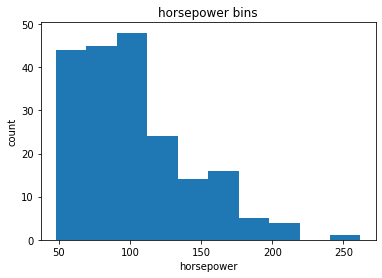

In [484]:
#Ahora vamos a graficar horsepower para ver como se encuntran distribuidos los datos
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Ahora que conocemos la distribución de los datos, vamos a dividir todo nuestro conjunto de datos de "horsepower" en 3 grupos solamente, estos deben de estar del mismo tamaño.

Para ello nos vamos apoyar de **linspace(start_value, end_value, numbers_generated)** de la librería de numpy.

Dado que queremos incluir el valor minimo y maximo de horsepower debemos de poner nuestro valor inicial como el minimo min(df["horsepower"]) y el máximo max(df["horsepower"])

Dado el caso que solo tendremos 3 grupos, debemos de poner el tamaño de la división como 4, ya que así tendremos el primer grupo con el valor minimo, el tercer grupo con el valor maximo y el grupo 2 con los valores intermedios dentro de esos dos min to max grupos por ende los grupos quedarían asi:

* Low: 48-11
* Med: 119-190
* High: 190-262

In [485]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Ahora generamos los nombres de cada uno de los grupos

In [486]:
group_names = ['Low', 'Medium', 'High']

Ahora utilizamos la función de cut para determinar que valor de df["horsepower"] pertenece.

In [487]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Ahora vamos a visualizar el número de vehiculos que quedaron en cada grupo.


In [488]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

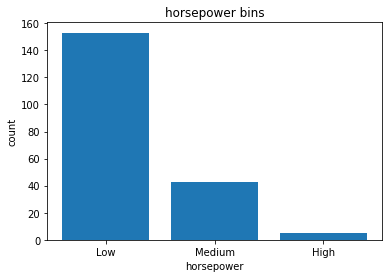

In [489]:
#Procedemos a graficar cada uno de los grupos para ver su distribucion de datos
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Como se observa en la grafica de arriba, pudimos resumir de 59 variantes de potencia en motor que teníamos a tan solo 3 grupos.

**Dummy Variable**

Una variable indicadora (o variable ficticia) es una variable numérica utilizada para etiquetar categorías. Se les llama 'dummy' porque los números en sí mismos no tienen un significado inherente.

Usamos variables indicadoras para poder usar variables categóricas para el análisis de regresión en los módulos posteriores.



Ejemplo

Vemos que la columna "tipo de combustible" tiene dos valores únicos: "gas" o "diésel". La regresión no entiende de palabras, sólo de números. Para usar este atributo en el análisis de regresión, convertimos "tipo de combustible" en variables indicadoras.

Usaremos el método de pandas 'get_dummies' para asignar valores numéricos a diferentes categorías de tipo de combustible.

In [490]:
#Obtenemos el nombre de todas las columnas que trae nuestro dataset
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [491]:
#Asignamos a nuestra variable dummy_variable el valor de nuestra columna "fuel-type" ya codificado
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [492]:
#Formateamos los headers de nuestras columnas
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Como se observa arriba, ahora la columna de "fuel-type" tiene valores para "gas" y "diesel" de 0 y 1

In [493]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [494]:
df.head()

,symboling,normalized_losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


###Question 4: 
Similar a antes, cree una variable indicadora para la columna "aspiración"

In [495]:
#Visualizamos los valores de la columna aspiration
df["aspiration"]

0        std
1        std
2        std
3        std
4        std
       ...  
196      std
197    turbo
198      std
199    turbo
200    turbo
Name: aspiration, Length: 201, dtype: object

In [496]:
#Asignamos a nuestra variable dummy_variable el valor de nuestra columna "aspiration" ya codificado
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [497]:
#Formateamos los headers de nuestras columnas
dummy_variable_2.rename(columns={'std':'aspiration-type-std', 'turbo':'aspiration-type-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-type-std,aspiration-type-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Question 5:
Combine el nuevo marco de datos con el marco de datos original, luego suelte la columna 'aspiración'.

In [498]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)


In [504]:
df.head()

,symboling,normalized_losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,aspiration-type-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0
